In [5]:
# datasetX, principle components U, the numbers of dimensions to reduce to k
import time
import numpy as np
# sklearn are prohibited
import os
#import sklearn
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from PIL import Image
import random

load image

In [6]:
path = '/media/chang_1909004/970pro/PL/clean960seg/' #png
#path = 'PL/2019/05/08/' #jpg
#image= misc.imread(path + filenamelist[0], flatten= 0)

png_pathlist = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            png_pathlist.append(os.path.join(r, file))

len(png_pathlist)

17672640

In [7]:
Start = 0
Stop =  len(png_pathlist) - 1
limit = len(png_pathlist) // 100
random.seed(10) #1
RandomListOfIntegers = [random.randint(Start, Stop) for iter in range(limit)]

In [8]:
len(RandomListOfIntegers)

176726

In [9]:
# png_imagelist = []
# #raw_jpg_imagelist = []
# for i in RandomListOfIntegers:
#     image = mpimg.imread(png_pathlist[i])
#     #raw_jpg_imagelist.append(image.flatten())
#     png_imagelist.append(image[:, :, 0].flatten())
# # imagelist 672張圖的(1216, 608)

In [10]:
from multiprocessing import Pool

def read_image(path_index):
    image = mpimg.imread(png_pathlist[path_index])
    return image[:, :, 0].flatten()

p = Pool(processes=18)

png_imagelist = p.map(read_image, RandomListOfIntegers)
p.close()
p.join()

In [11]:
len(png_imagelist)

176726

In [12]:
png_imagelist[0].shape

(12342,)

In [13]:
x = mpimg.imread(png_pathlist[RandomListOfIntegers[0]])

In [14]:
x.shape

(102, 121, 3)

/media/chang_1909004/970pro/PL/clean960seg/0_3000/PL_2019_05_03_19502CAP_14_A1MAQP0304_659.jpg


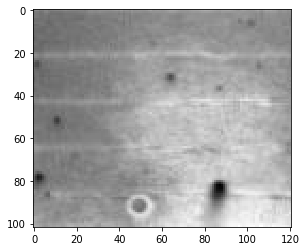

In [15]:
print(png_pathlist[RandomListOfIntegers[0]])
plt.imshow(mpimg.imread(png_pathlist[RandomListOfIntegers[0]]), cmap='gray')

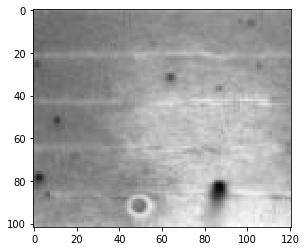

In [16]:
plt.imshow(png_imagelist[0].reshape(mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[0], mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[1]), cmap= 'gray')

image segmentation

In [17]:
# num = 0
# rownum = 20
# colnum = 4
# noise_segmentation_path = "noise_segmentation/"
# rowheight = image[0].shape[0] // rownum
# colwidth = image[0].shape[1] // colnum
# for img_path in png_pathlist:
#     img = plt.imread(img_path) #(2469, 4870)
#     seg_num = 0
#     for r in range(rownum):
#         for c in range(colnum):
#             x = img[img.shape[0]//rownum*r:img.shape[0]//rownum*(r+1), img.shape[1]//colnum*c:img.shape[1]//colnum*(c+1)]
# #             box = (c * colwidth, r * rowheight, (c + 1) * colwidth, (r + 1) * rowheight)
# #             img.crop(box).save(os.path.join(dstpath, basename + '_' + str(num) + '.' + ext), ext)
#             seg_num += 1
#             plt.imsave(noise_segmentation_path + img_path[-20:-4] + "_" + str(seg_num) + ".png", x, cmap='gray')
#             num = num + 1

load noise_segmentation image

In [18]:
# path = '/media/chang_1909004/970pro/PL/20seg_PCA/'
# #image= misc.imread(path + filenamelist[0], flatten= 0)

# png_pathlist = []
# # r=root, d=directories, f = files
# for r, d, f in os.walk(path):
#     for file in f:
#         if '.png' in file:
#             png_pathlist.append(os.path.join(r, file))

# len(png_pathlist)

In [19]:
# png_imagelist = []
# for i in range(len(png_pathlist)):
#     image = mpimg.imread(png_pathlist[i])
#     png_imagelist.append(image[:, :, 0].flatten())
# # imagelist 672(1216, 608)

PCA

In [20]:
components = 100

In [21]:
# pca_array = np.array(png_imagelist)

In [22]:
from sklearn.decomposition import IncrementalPCA

In [23]:
# from sklearn.decomposition import IncrementalPCA
# from scipy import sparse
# X, _ = load_digits(return_X_y=True)
# transformer = IncrementalPCA(n_components=7, batch_size=200)
# # either partially fit on smaller batches of data
# transformer.partial_fit(X[:100, :])

# # or let the fit function itself divide the data into batches
# X_sparse = sparse.csr_matrix(X)
# X_transformed = transformer.fit_transform(X_sparse)
# X_transformed.shape

In [24]:
# pca = IncrementalPCA(n_components=components, batch_size=300)
# X_train_pca = pca.fit_transform(png_imagelist)

In [25]:
pca = PCA(n_components=components)
X_train_pca = pca.fit_transform(png_imagelist)

In [26]:
# print(pca.explained_variance_ratio_)
# print(len(pca.explained_variance_ratio_))
# print(pca.singular_values_)
# print(len(pca.singular_values_))

In [27]:
len(pca.components_)

100

In [28]:
pca.components_[0].shape

(12342,)

In [29]:
for i in range(components):
    plt.imsave("/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA/" + str(i) + ".jpg", pca.components_[i].reshape(mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[0], mpimg.imread(png_pathlist[RandomListOfIntegers[0]]).shape[1]), cmap='gray')

In [30]:
png_pathlist[0]

'/media/chang_1909004/970pro/PL/clean960seg/0_3000/PL_2019_05_17_19516EAP_84_A1MA5P0218_191.jpg'

In [31]:
image = mpimg.imread(png_pathlist[0])

In [32]:
pca.components_.shape

(100, 12342)

In [33]:
len(pca.components_[0])

12342

In [34]:
pca.explained_variance_ratio_.shape

(100,)

In [35]:
# pca.score(png_imagelist)

In [36]:
png_imagelist[0].shape

(12342,)

In [37]:
# X_train_pca = pca.fit_transform(png_imagelist)

In [38]:
X_train_pca.shape

(176726, 100)

In [39]:
X_train_pca[0].shape

(100,)

In [40]:
pca.components_.shape

(100, 12342)

In [41]:
png_pathlist[0]

'/media/chang_1909004/970pro/PL/clean960seg/0_3000/PL_2019_05_17_19516EAP_84_A1MA5P0218_191.jpg'

In [42]:
len(png_imagelist)

176726

In [44]:
from multiprocessing import Pool

def read_image(path_index):
    plt.imsave("/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_" + png_pathlist[RandomListOfIntegers[path_index]].replace("/media/chang_1909004/970pro/PL/clean960seg/", "").replace("/", "_") , np.concatenate((png_imagelist[path_index].reshape(x.shape[0], x.shape[1]), np.dot(X_train_pca[path_index], pca.components_).reshape(x.shape[0], x.shape[1]), np.subtract(png_imagelist[path_index].reshape(x.shape[0], x.shape[1]), np.dot(X_train_pca[path_index], pca.components_).reshape(x.shape[0], x.shape[1]))), axis=1), cmap='gray')
    return

p = Pool(processes=18)

p.map(read_image, range(len(png_imagelist)))
p.close()
p.join()

run above

In [46]:
png_pathlist[RandomListOfIntegers[path_index]]

NameError: name 'path_index' is not defined

In [52]:
len(png_imagelist)

22313

In [ ]:
plt.imsave("/media/chang_1909004/970pro/PL/22313_clean40seg_20PCA_processed/compared_" + 
           png_pathlist[RandomListOfIntegers[path_index]].replace("/media/chang_1909004/970pro/PL/clean40seg/", "")
           , np.concatenate((png_imagelist[path_index].reshape(x.shape[0], x.shape[1])
            , np.dot(X_train_pca[path_index], pca.components_).reshape(x.shape[0], x.shape[1])
            )
            , axis=1), cmap='gray')
   

In [40]:
# plt.imsave("/media/chang_1909004/970pro/PL/22313_clean40seg_20PCA_processed/compared_" + 
#            png_pathlist[RandomListOfIntegers[path_index]].replace("/media/chang_1909004/970pro/PL/clean40seg/", "")
#            , np.concatenate((png_imagelist[path_index].reshape(x.shape[0], x.shape[1])
#             , np.dot(X_train_pca[path_index], pca.components_).reshape(x.shape[0], x.shape[1])
#             , np.subtract(png_imagelist[path_index].reshape(x.shape[0], x.shape[1])
#         , np.dot(X_train_pca[path_index], pca.components_).reshape(x.shape[0], x.shape[1])))
#             , axis=1), cmap='gray')
   

PCA image analysis

In [41]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np

In [42]:
i = 40

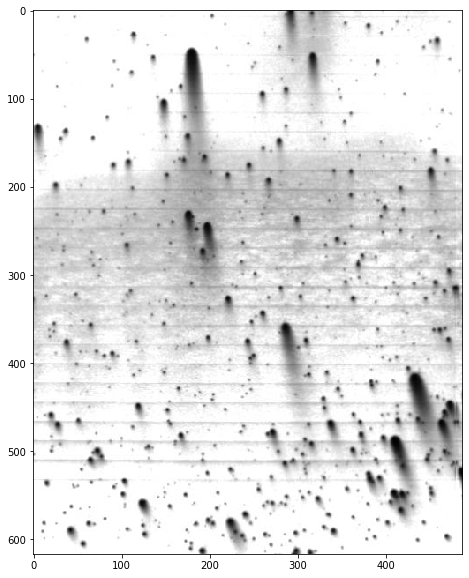

In [43]:
fig = pyplot.figure(figsize=(300, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(png_imagelist[i].reshape(x.shape[0], x.shape[1]), cmap='gray')

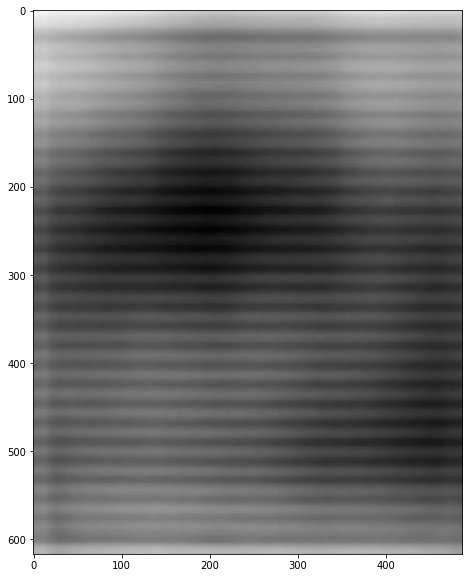

In [45]:
fig = pyplot.figure(figsize=(300, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(np.dot(X_train_pca[i], pca.components_).reshape(x.shape[0], x.shape[1]), cmap='gray')

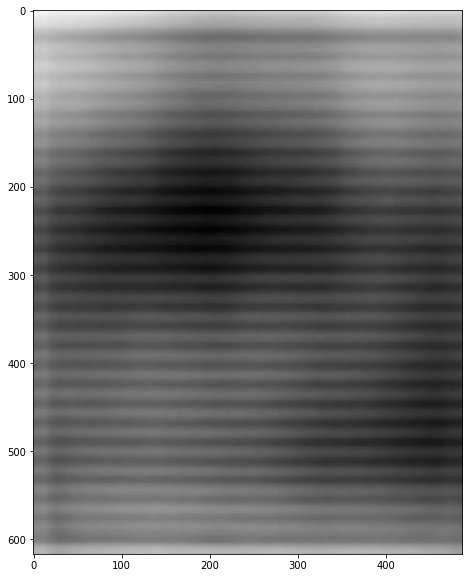

In [47]:
fig = pyplot.figure(figsize=(300, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(np.multiply(np.dot(X_train_pca[i], pca.components_), 1).reshape(x.shape[0], x.shape[1]), cmap='gray')

In [108]:
max(np.dot(X_train_pca[i], pca.components_))

70.02845447904842

In [109]:
min(np.dot(X_train_pca[i], pca.components_))

-77.88122015910746

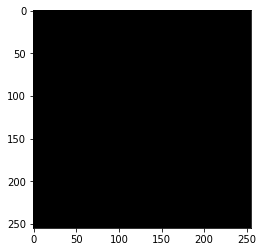

In [130]:
plt.imshow(np.add(np.zeros([255,255]), np.multiply(np.ones([255,255]),-70)), cmap='gray')


In [131]:
np.add(np.zeros([255,255]), np.multiply(np.ones([255,255]), -76))

array([[-76., -76., -76., ..., -76., -76., -76.],
       [-76., -76., -76., ..., -76., -76., -76.],
       [-76., -76., -76., ..., -76., -76., -76.],
       ...,
       [-76., -76., -76., ..., -76., -76., -76.],
       [-76., -76., -76., ..., -76., -76., -76.],
       [-76., -76., -76., ..., -76., -76., -76.]])

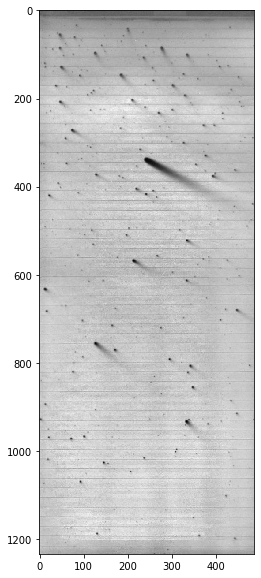

In [111]:
fig = pyplot.figure(figsize=(300, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(np.subtract(png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487)), cmap='gray')

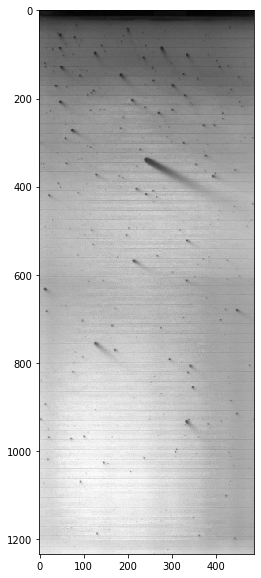

In [112]:
fig = pyplot.figure(figsize=(300, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(np.add(png_imagelist[i].reshape(1234, 487), np.dot(X_train_pca[i], pca.components_).reshape(1234, 487)), cmap='gray')